### Name: Yusuf Saheed Taiwo
### Student Number : 202121964

In [1]:
import numpy as np
import pandas as pd
import keras
from keras import models
from keras import layers
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sbn

#### Read and process data

In [2]:
df = pd.read_csv('water-analysis.csv')

In [3]:
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header
df = df[:828]

In [4]:
def clean_data(df):
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].replace("ND", 0) 
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].replace("ND", 0) 
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].replace("ND", 0) 
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].replace("ND", 0)
    df["Alexandrium spp. \ncells L-1\n(PSP)"] = pd.to_numeric(df["Alexandrium spp. \ncells L-1\n(PSP)"], errors='coerce') 
    df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = pd.to_numeric(df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "], errors='coerce') 
    df["Dinophysiaceae \ncells L-1\n(DSP)"] = pd.to_numeric(df["Dinophysiaceae \ncells L-1\n(DSP)"], errors='coerce') 
    df["Prorocentrum lima \ncells L-1\n(DSP)"] = pd.to_numeric(df["Prorocentrum lima \ncells L-1\n(DSP)"], errors='coerce')

In [5]:
clean_data(df)

In [6]:
df["Alexandrium spp. \ncells L-1\n(PSP)"] = df["Alexandrium spp. \ncells L-1\n(PSP)"].fillna(-1)
df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "] = df["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "].fillna(-1)
df["Dinophysiaceae \ncells L-1\n(DSP)"] = df["Dinophysiaceae \ncells L-1\n(DSP)"].fillna(-1)
df["Prorocentrum lima \ncells L-1\n(DSP)"] = df["Prorocentrum lima \ncells L-1\n(DSP)"].fillna(-1)

In [7]:
thresholds = {"Alexandrium spp. \ncells L-1\n(PSP)" : 40, "Dinophysiaceae \ncells L-1\n(DSP)" : 100, "Prorocentrum lima \ncells L-1\n(DSP)" : 100, "Pseudo-nitzschia spp. \ncells L-1\n(ASP) " : 150000}

In [8]:
def check_thresholds(df):
    t = []
    for i,j in enumerate(df["Sample number"]):
        alexandrium = df.iloc[i]["Alexandrium spp. \ncells L-1\n(PSP)"]
        pseudo_nitzschia = df.iloc[i]["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]
        dinophysiaceae = df.iloc[i]["Dinophysiaceae \ncells L-1\n(DSP)"]
        prorocentrum = df.iloc[i]["Prorocentrum lima \ncells L-1\n(DSP)"]
        threshold_reached = 0
        if pseudo_nitzschia >= thresholds["Pseudo-nitzschia spp. \ncells L-1\n(ASP) "]:
            threshold_reached = 1
        elif dinophysiaceae >= thresholds["Dinophysiaceae \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif prorocentrum >= thresholds["Prorocentrum lima \ncells L-1\n(DSP)"]:
            threshold_reached = 1
        elif alexandrium >= thresholds["Alexandrium spp. \ncells L-1\n(PSP)"]:
            threshold_reached = 1
        t.append(threshold_reached)
    return t

In [9]:
thresholds_reached = check_thresholds(df)
df['thresholds_reached'] = thresholds_reached

In [10]:
df['thresholds_reached'].value_counts()

0    733
1     95
Name: thresholds_reached, dtype: int64

#### Write cleaned data to csv fle

In [11]:
pd.DataFrame.to_csv(df, 'thresholds_cleaned.csv', sep=',', index=False)

In [12]:
x = pd.read_csv('thresholds_cleaned.csv', usecols=["Pseudo-nitzschia spp. \ncells L-1\n(ASP) ", "Dinophysiaceae \ncells L-1\n(DSP)", "Prorocentrum lima \ncells L-1\n(DSP)", "Alexandrium spp. \ncells L-1\n(PSP)"], na_values = ['no info', '.'])
y = pd.read_csv('thresholds_cleaned.csv', usecols=["thresholds_reached"])

In [13]:
x.columns

Index(['Alexandrium spp. \ncells L-1\n(PSP)',
       'Dinophysiaceae \ncells L-1\n(DSP)',
       'Prorocentrum lima \ncells L-1\n(DSP)',
       'Pseudo-nitzschia spp. \ncells L-1\n(ASP) '],
      dtype='object')

In [14]:
def plot_graph(validation_data, training_data, graph_type):
    plt.clf()
    plt.figure(figsize=(6,6))
    epochs = range(1, len(training_data) + 1)
    plt.plot(epochs, training_data, 'r', label='Training '+graph_type)
    plt.plot(epochs, validation_data, 'b', label='Validation '+graph_type)
    plt.title('Training and validation '+graph_type)
    plt.xlabel('Epochs')
    plt.ylabel(graph_type)
    plt.legend()
    plt.show()

#### Model Before Augmentation

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

2021-12-13 13:32:34.477937: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
42/42 [==============================] - 1s 9ms/step - loss: 0.5492 - accuracy: 0.9003 - val_loss: 0.4698 - val_accuracy: 0.9277
Epoch 2/10
42/42 [==============================] - 0s 5ms/step - loss: 0.4148 - accuracy: 0.8912 - val_loss: 0.3732 - val_accuracy: 0.9277
Epoch 3/10
42/42 [==============================] - 0s 4ms/step - loss: 0.3175 - accuracy: 0.9063 - val_loss: 0.2731 - val_accuracy: 0.9217
Epoch 4/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2993 - accuracy: 0.9109 - val_loss: 0.2952 - val_accuracy: 0.9277
Epoch 5/10
42/42 [==============================] - 0s 3ms/step - loss: 0.2950 - accuracy: 0.9124 - val_loss: 0.2095 - val_accuracy: 0.9277
Epoch 6/10
42/42 [==============================] - 0s 4ms/step - loss: 0.2608 - accuracy: 0.9184 - val_loss: 0.2382 - val_accuracy: 0.9337
Epoch 7/10
42/42 [==============================] - 0s 4ms/step - loss: 0.2669 - accuracy: 0.9094 - val_loss: 0.2349 - val_accuracy: 0.9337
Epoch 8/10
42/42 [==

<Figure size 432x288 with 0 Axes>

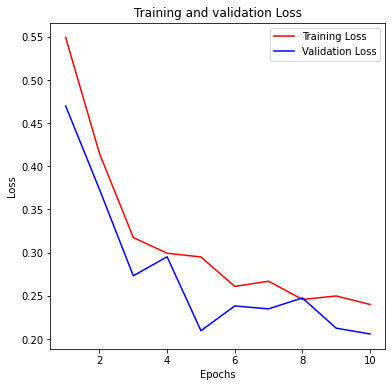

<Figure size 432x288 with 0 Axes>

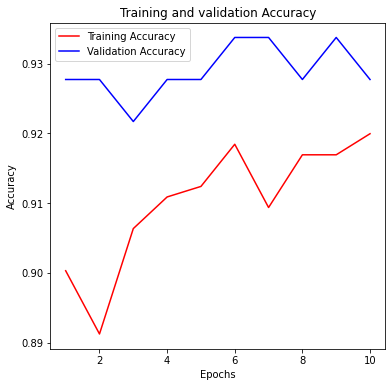

In [16]:
model1 = models.Sequential()
model1.add(Dense(units=1000, activation='tanh', input_shape=(4,)))
model1.add(Dropout(0.9))
model1.add(Dense(units=500, activation='tanh'))
model1.add(Dense(units=1, activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=["accuracy"])
history = model1.fit(x_train, y_train, batch_size=16, epochs=10, validation_data=(x_test, y_test))
plot_graph(history.history['val_loss'], history.history['loss'], 'Loss')
plot_graph(history.history['val_accuracy'], history.history['accuracy'], 'Accuracy')

In [17]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              5000      
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
Total params: 506,001
Trainable params: 506,001
Non-trainable params: 0
_________________________________________________________________


In [18]:
model1.evaluate(x_test, y_test, verbose=1)

6/6 [==============================] - 0s 1ms/step - loss: 0.2058 - accuracy: 0.9277


[0.20575213432312012, 0.9277108311653137]

In [19]:
from collections import Counter
counter = Counter(y["thresholds_reached"])
print(counter)

Counter({0: 733, 1: 95})


#### Choosing majority baseline with DummyClassifier

In [20]:
import numpy as np
from sklearn.dummy import DummyClassifier
dcf = DummyClassifier(strategy="most_frequent")
dcf.fit(x, y)
DummyClassifier(strategy='most_frequent')
dcf.predict(x)
dcf.score(x, y)

0.8852657004830918

#### Data Augmentation added with SMOTE

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
oversample = SMOTE(random_state=2)
x, y = oversample.fit_resample(x, y['thresholds_reached'].ravel())

In [23]:
Counter(y)

Counter({0: 733, 1: 733})

### Three different architectures after augmentation 

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

#### First Model
- 3 hidden layers (2 dropouts)
- Activation function : Relu
- Optimizer function : rmsprop
- Last Layer activation function : sigmoid
- Loss : binary_crossentropy

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               500       
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 40)                4040      
                                                                 
 dropout_2 (Dropout)         (None, 40)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 41        
                                                                 
Total params: 4,581
Trainable params: 4,581
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
74/74 [==============================] - 

<Figure size 432x288 with 0 Axes>

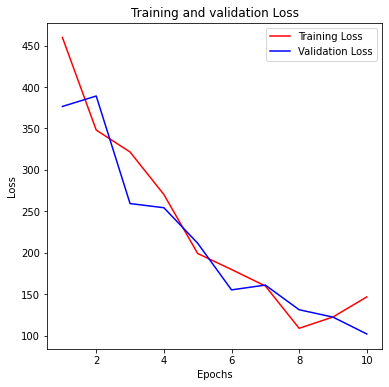

<Figure size 432x288 with 0 Axes>

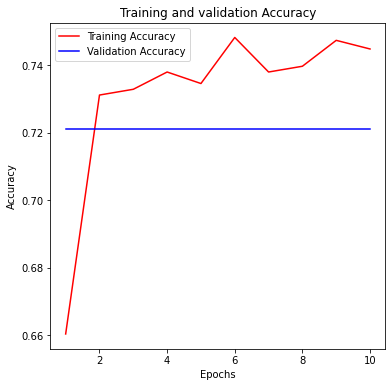

10/10 [==============================] - 0s 805us/step - loss: 101.8674 - accuracy: 0.7211


[101.86740112304688, 0.7210884094238281]

In [25]:
model = models.Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(4,))) 
model.add(Dropout(0.50))
model.add(Dense(units=40, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=16, epochs=10, verbose=1, validation_data=(x_test, y_test)) 
score = model.evaluate(x_test, y_test, verbose=0)
plot_graph(history.history['val_loss'], history.history['loss'], 'Loss')
plot_graph(history.history['val_accuracy'], history.history['accuracy'], 'Accuracy')
model.evaluate(x_test, y_test)

#### Second Model
- 3 hidden layers (1 dropout)
- Activation function : Relu
- Optimizer function : rmsprop
- Last Layer activation function : sigmoid
- Loss : binary_crossentropy

Epoch 1/10
37/37 [==============================] - 1s 5ms/step - loss: 571.4901 - accuracy: 0.6433 - val_loss: 210.4073 - val_accuracy: 0.7211
Epoch 2/10
37/37 [==============================] - 0s 2ms/step - loss: 117.6367 - accuracy: 0.7270 - val_loss: 149.6158 - val_accuracy: 0.7211
Epoch 3/10
37/37 [==============================] - 0s 2ms/step - loss: 69.3297 - accuracy: 0.7423 - val_loss: 165.9437 - val_accuracy: 0.7211
Epoch 4/10
37/37 [==============================] - 0s 2ms/step - loss: 64.4194 - accuracy: 0.7585 - val_loss: 86.0219 - val_accuracy: 0.7211
Epoch 5/10
37/37 [==============================] - 0s 2ms/step - loss: 38.7231 - accuracy: 0.7551 - val_loss: 42.6636 - val_accuracy: 0.7211
Epoch 6/10
37/37 [==============================] - 0s 2ms/step - loss: 29.1054 - accuracy: 0.7671 - val_loss: 3.5074 - val_accuracy: 0.8061
Epoch 7/10
37/37 [==============================] - 0s 2ms/step - loss: 18.8122 - accuracy: 0.7577 - val_loss: 7.9134 - val_accuracy: 0.7619
Epo

<Figure size 432x288 with 0 Axes>

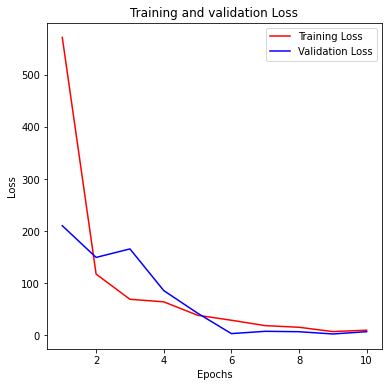

<Figure size 432x288 with 0 Axes>

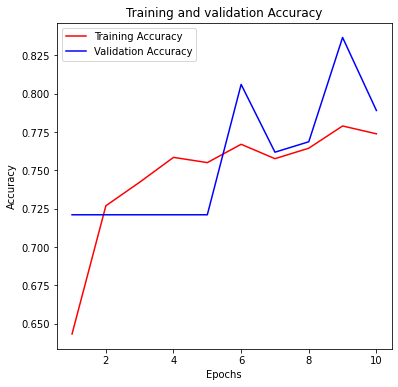

10/10 [==============================] - 0s 907us/step - loss: 7.1625 - accuracy: 0.7891


[7.162487030029297, 0.7891156673431396]

In [26]:
model = models.Sequential()
model.add(Dense(units=60, activation='relu', input_shape=(4,)))
model.add(Dense(units=30, activation='relu'))
model.add(Dropout(0.50))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="nadam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), verbose=1)
plot_graph(history.history['val_loss'], history.history['loss'], 'Loss')
plot_graph(history.history['val_accuracy'], history.history['accuracy'], 'Accuracy')
model.evaluate(x_test, y_test)

#### Third Model
- 4 hidden layers (2 dropouts)
- Activation function : tanh
- Optimizer function : adam
- Last Layer activation function : sigmoid
- Loss : binary_crossentropy

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 100)               500       
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 40)                4040      
                                                                 
 dropout_5 (Dropout)         (None, 40)                0         
                                                                 
 dense_12 (Dense)            (None, 30)                1230      
                                                                 
 dense_13 (Dense)            (None, 1)                 31        
                                                                 
Total params: 5,801
Trainable params: 5,801
Non-traina

<Figure size 432x288 with 0 Axes>

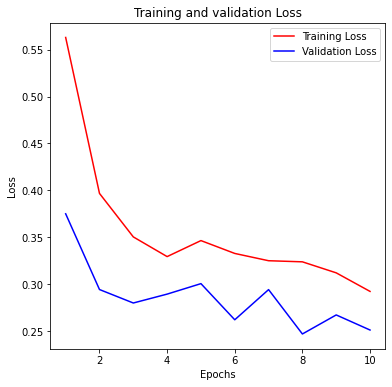

<Figure size 432x288 with 0 Axes>

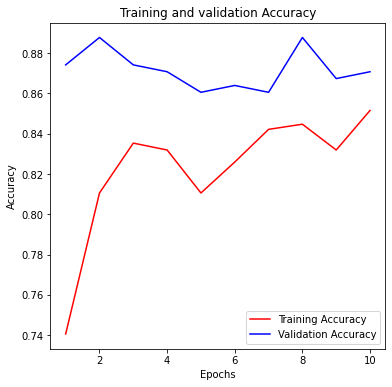

10/10 [==============================] - 0s 1ms/step - loss: 0.2511 - accuracy: 0.8707


[0.2510853409767151, 0.8707482814788818]

In [27]:
model = models.Sequential()
model.add(Dense(units=100, activation='tanh', input_shape=(4,))) 
model.add(Dropout(0.25))
model.add(Dense(units=40, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(units=30, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                    batch_size=16, 
                    epochs=10, 
                    verbose=1, 
                    validation_data=(x_test, y_test)) 
score = model.evaluate(x_test, y_test, verbose=0)
plot_graph(history.history['val_loss'], history.history['loss'], 'Loss')
plot_graph(history.history['val_accuracy'], history.history['accuracy'], 'Accuracy')
model.evaluate(x_test, y_test)

#### Model with more than 4 hidden layers
- 7 hidden layers (4 dropouts)
- Activation function : tanh
- Optimizer function : adam
- Last Layer activation function : sigmoid
- Loss : binary_crossentropy

Epoch 1/10
37/37 [==============================] - 1s 6ms/step - loss: 0.6789 - accuracy: 0.6706 - val_loss: 0.4871 - val_accuracy: 0.7211
Epoch 2/10
37/37 [==============================] - 0s 3ms/step - loss: 0.5988 - accuracy: 0.6971 - val_loss: 0.5120 - val_accuracy: 0.7211
Epoch 3/10
37/37 [==============================] - 0s 3ms/step - loss: 0.5782 - accuracy: 0.7133 - val_loss: 0.3593 - val_accuracy: 0.7211
Epoch 4/10
37/37 [==============================] - 0s 3ms/step - loss: 0.5166 - accuracy: 0.7389 - val_loss: 0.3283 - val_accuracy: 0.8571
Epoch 5/10
37/37 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.7389 - val_loss: 0.3186 - val_accuracy: 0.8503
Epoch 6/10
37/37 [==============================] - 0s 3ms/step - loss: 0.4640 - accuracy: 0.7705 - val_loss: 0.3251 - val_accuracy: 0.8469
Epoch 7/10
37/37 [==============================] - 0s 3ms/step - loss: 0.4869 - accuracy: 0.7654 - val_loss: 0.3341 - val_accuracy: 0.8435
Epoch 8/10
37/37 [==

<Figure size 432x288 with 0 Axes>

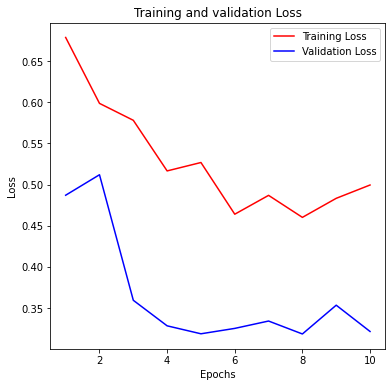

<Figure size 432x288 with 0 Axes>

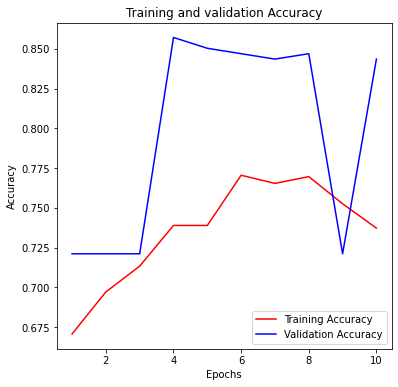

10/10 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8435


[0.3214070200920105, 0.8435373902320862]

In [28]:
model = models.Sequential()
model.add(Dense(units=300, activation='tanh', input_shape=(4,)))
model.add(Dropout(0.90))
model.add(Dense(units=200, activation='tanh'))
model.add(Dropout(0.50))
model.add(Dense(units=150, activation='tanh'))
model.add(Dropout(0.25))
model.add(Dense(units=100, activation='tanh'))
model.add(Dropout(0.50))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), verbose=1)
plot_graph(history.history['val_loss'], history.history['loss'], 'Loss')
plot_graph(history.history['val_accuracy'], history.history['accuracy'], 'Accuracy')
model.evaluate(x_test, y_test)

#### Correlation plot

Text(0.5, 1.0, 'Heatmap of phytoplankton data correlation')

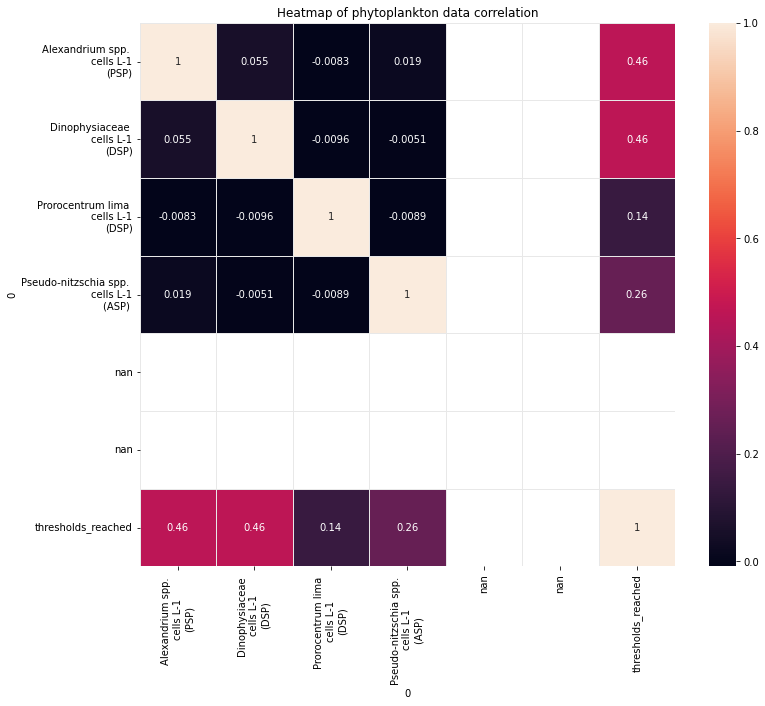

In [29]:
fig, ax = plt.subplots(figsize=(12,10))
sbn.heatmap(df.corr(), annot=True, ax=ax, linewidths=1, linecolor='#e8e8e8')
plt.title('Heatmap of phytoplankton data correlation')